## Day 3 - Exercise - Create Risk Score

Team members: 

1) Amber Wu
2) Shamika Kalwe
3) Xuanqi Liang
4) Maraline Torres

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('hiringData.csv')
df.drop(columns='Unnamed: 0', inplace = True)
df.shape

(2000, 7)

In [2]:
df.head()

,group,A,B,C,D,E,hired
0,male,0.056369,0.0,1.000000,0.347826,0.406201,1
1,female,0.056369,0.0,1.000000,0.347826,0.406201,0
2,male,1.000000,1.0,0.000000,0.260870,0.000000,0
3,male,0.000000,0.0,0.813711,0.086957,1.000000,1
4,female,0.195270,0.5,0.934376,0.086957,0.477683,0


## Using Linear Regression - Probability

In [26]:
X = df.iloc[:,1:6]
y = df.iloc[:,6:7]

Predictors from A to E

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

Coefficients: 
 [[ 0.77139506 -0.45318828  0.1510726   0.38169653  0.53856704]]
Mean squared error: 0.17
Coefficient of determination: 0.27


Adding the group (female or male) to see if the risk score is bias. 

In [29]:
df2 = df.copy()
df2['group'] = np.where(df2.group == 'female', 1, 0)
df2.head()

,group,A,B,C,D,E,hired
0,0,0.056369,0.0,1.000000,0.347826,0.406201,1
1,1,0.056369,0.0,1.000000,0.347826,0.406201,0
2,0,1.000000,1.0,0.000000,0.260870,0.000000,0
3,0,0.000000,0.0,0.813711,0.086957,1.000000,1
4,1,0.195270,0.5,0.934376,0.086957,0.477683,0


In [32]:
X = df2.iloc[:,0:6]
y = df2.iloc[:,6:7]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

Coefficients: 
 [[ 0.02852583  0.77761617 -0.46986243  0.1460262   0.37841541  0.53875101]]
Mean squared error: 0.17
Coefficient of determination: 0.27


## Using Logistic Regression

In [33]:
df3 = df.copy()
df3['group'] = np.where(df3.group == 'female', 1, 0)
df3.head()

,group,A,B,C,D,E,hired
0,0,0.056369,0.0,1.000000,0.347826,0.406201,1
1,1,0.056369,0.0,1.000000,0.347826,0.406201,0
2,0,1.000000,1.0,0.000000,0.260870,0.000000,0
3,0,0.000000,0.0,0.813711,0.086957,1.000000,1
4,1,0.195270,0.5,0.934376,0.086957,0.477683,0


In [36]:
from sklearn.linear_model import LogisticRegression

X = df3.iloc[:,1:6]
y = df3.iloc[:,6:7]


model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

/Users/maralinetorres/opt/miniconda3/envs/msba/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coefficients: 
 [[ 4.02298016 -2.50659046  0.83908604  1.72991685  2.51157688]]
Mean squared error: 0.27
Coefficient of determination: -0.14


In [37]:
X = df3.iloc[:,0:6]
y = df3.iloc[:,6:7]

model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

Coefficients: 
 [[ 0.14653098  4.052127   -2.59153223  0.7975202   1.72276937  2.5244532 ]]
Mean squared error: 0.27
Coefficient of determination: -0.14


/Users/maralinetorres/opt/miniconda3/envs/msba/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
y_pred.shape

(2000,)

In [39]:
y_test.shape

(400, 0)

In [40]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  hired   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     123.4
Date:                Thu, 20 May 2021   Prob (F-statistic):          7.81e-133
Time:                        07:50:58   Log-Likelihood:                -1091.1
No. Observations:                2000   AIC:                             2196.
Df Residuals:                    1993   BIC:                             2235.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2461      0.033     -7.389      0.0

Gender is not significant. Therefore, we can say that the algorithm is not bias. 


## Working with another dataset that has the 'quality' variable

In [43]:
X = df3.iloc[:,1:6]
y = df3.iloc[:,6:7]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

Coefficients: 
 [[ 0.77139506 -0.45318828  0.1510726   0.38169653  0.53856704]]
Mean squared error: 0.17
Coefficient of determination: 0.27


In [44]:
logist_pred = pd.DataFrame({'actual': y.values.reshape(-1,), 'risk_score': y_pred.reshape(-1,)})
logist_pred['group'] = df3.group
logist_pred.head()

,actual,risk_score,group
0,1,0.306890,0
1,0,0.306890,1
2,0,0.178584,0
3,1,0.455492,0
4,0,0.116454,1


In [45]:
data = pd.read_csv('hiringDataWLatentVariable.csv')
data.shape

(2000, 9)

In [46]:
data.head()

,Unnamed: 0,group,A,B,C,D,E,hired,quality
0,126,male,0.056369,0.0,1.000000,0.347826,0.406201,1,0.165853
1,1353,female,0.056369,0.0,1.000000,0.347826,0.406201,0,0.165752
2,83,male,1.000000,1.0,0.000000,0.260870,0.000000,0,0.608314
3,219,male,0.000000,0.0,0.813711,0.086957,1.000000,1,0.455447
4,1567,female,0.195270,0.5,0.934376,0.086957,0.477683,0,0.312300


In [47]:
data.drop(columns='Unnamed: 0', inplace = True)

In [48]:
logist_pred['quality'] = data.quality
logist_pred.head()

,actual,risk_score,group,quality
0,1,0.306890,0,0.165853
1,0,0.306890,1,0.165752
2,0,0.178584,0,0.608314
3,1,0.455492,0,0.455447
4,0,0.116454,1,0.312300


## Regression with quality only

In [49]:
df4 = logist_pred.copy()
X = df4.iloc[:,3:4]
y = df4.iloc[:,1:2].values

In [52]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

Coefficients: 
 [[0.44949318]]
Mean squared error: 0.04
Coefficient of determination: 0.31


In [53]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     885.7
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.09e-161
Time:                        07:53:00   Log-Likelihood:                 269.06
No. Observations:                2000   AIC:                            -534.1
Df Residuals:                    1998   BIC:                            -522.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2067      0.008     26.108      0.0

## Adding the group variable

In [54]:
X = df4.iloc[:,2:4]
y = df4.iloc[:,1:2].values


model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y,y_pred))

Coefficients: 
 [[-0.09798038  0.47103994]]
Mean squared error: 0.04
Coefficient of determination: 0.34


In [56]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     522.7
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.80e-183
Time:                        07:53:24   Log-Likelihood:                 323.12
No. Observations:                2000   AIC:                            -640.2
Df Residuals:                    1997   BIC:                            -623.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.009     28.712      0.0

Group IS significant. Before, we thought it was fair but the risk score is actually affected by the gender. 


## Some EDA to explore why

In [57]:
df4.head()

,actual,risk_score,group,quality
0,1,0.306890,0,0.165853
1,0,0.306890,1,0.165752
2,0,0.178584,0,0.608314
3,1,0.455492,0,0.455447
4,0,0.116454,1,0.312300


In [58]:
df4['gender'] = np.where(df4.group == 0 , 'male', 'female')
confusion_matrix = pd.crosstab(df4['risk_score'], df4['gender'], rownames=['Risk Score'], colnames=['Gender'], normalize=True)
print(confusion_matrix)

Gender      female    male
Risk Score                
0.116454    0.0800  0.0760
0.156073    0.0280  0.0025
0.178584    0.1140  0.0535
0.306890    0.0615  0.0305
0.396394    0.0060  0.0685
0.407135    0.0310  0.0405
0.445236    0.0370  0.0840
0.455492    0.0465  0.0710
0.758860    0.0745  0.0100
0.991379    0.0215  0.0635


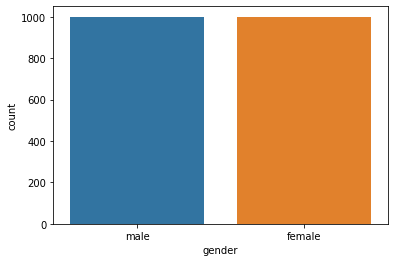

In [59]:
sns.countplot(x='gender', data=df4);

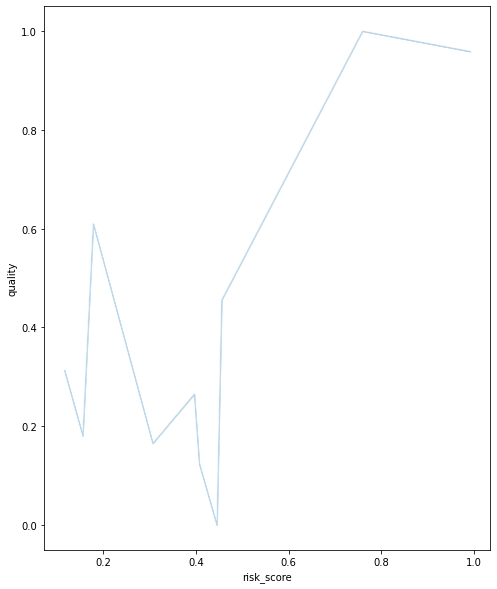

In [60]:
plt.figure(figsize=(8, 10))
sns.lineplot(x='risk_score',y='quality', data=df4.loc[df4.group == 1,:], alpha = 0.10);

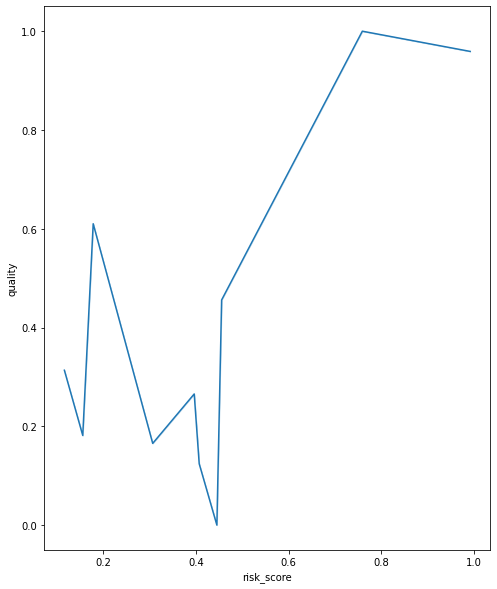

In [61]:
plt.figure(figsize=(8, 10))
sns.lineplot(x='risk_score',y='quality', data=df4.loc[df4.group == 0,:]);

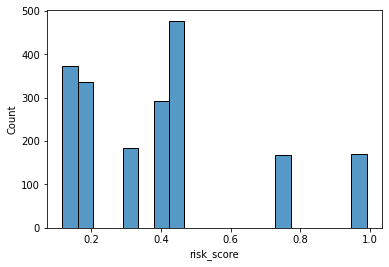

In [62]:
sns.histplot(df4.risk_score);

In [63]:
df4['High_Risk'] = np.where(df4.risk_score > .40, 1, 0)
confusion_matrix2 = pd.crosstab(df4['High_Risk'], df4['gender'], rownames=['High_Risk'], colnames=['Gender'], normalize=True)
print(confusion_matrix2)

Gender     female   male
High_Risk               
0          0.2895  0.231
1          0.2105  0.269


### Exploring using the original dataset

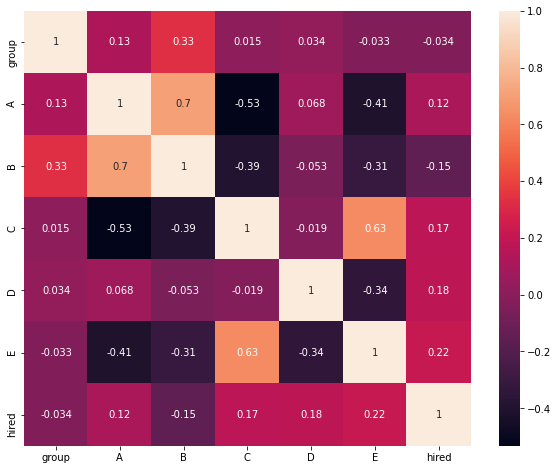

In [66]:
plt.figure(figsize=(10, 8))
corrMatrix = df3.corr()
sns.heatmap(corrMatrix, annot=True);

 From the above we see that gender is slightly correlated to B (0.33) and even more slightly with A (0.13)
 
 
 #### We will check the statistical significance of the same i.e. A, B, C, D, E versus Gender

In [68]:
X = df3[['group']]
y = df3['A']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     31.88
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.87e-08
Time:                        07:57:02   Log-Likelihood:                -821.39
No. Observations:                2000   AIC:                             1647.
Df Residuals:                    1998   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3851      0.012     33.360      0.0

In [69]:
X = df3[['group']]
y = df3['B']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     244.0
Date:                Thu, 20 May 2021   Prob (F-statistic):           5.42e-52
Time:                        07:57:19   Log-Likelihood:                -1004.7
No. Observations:                2000   AIC:                             2013.
Df Residuals:                    1998   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2055      0.013     16.243      0.0

In [71]:
X = df3[['group']]
y = df3['C']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4278
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.513
Time:                        07:57:42   Log-Likelihood:                -802.03
No. Observations:                2000   AIC:                             1608.
Df Residuals:                    1998   BIC:                             1619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6203      0.011     54.255      0.0

In [72]:
X = df3[['group']]
y = df3['D']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.301
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.129
Time:                        07:58:03   Log-Likelihood:                -516.47
No. Observations:                2000   AIC:                             1037.
Df Residuals:                    1998   BIC:                             1048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3426      0.010     34.563      0.0

In [73]:
X = df3[['group']]
y = df3['E']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.231
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.135
Time:                        07:58:17   Log-Likelihood:                -550.19
No. Observations:                2000   AIC:                             1104.
Df Residuals:                    1998   BIC:                             1116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4363      0.010     43.281      0.0

#### From the above we can conclude that gender affects A, B which caused our risk_score to be biased